# Homework 2

In [1]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv('allegro-api-transactions.csv')

In [2]:
df.shape

(420020, 14)

In [3]:
df.columns

Index(['lp', 'date', 'item_id', 'categories', 'pay_option_on_delivery',
       'pay_option_transfer', 'seller', 'price', 'it_is_allegro_standard',
       'it_quantity', 'it_is_brand_zone', 'it_seller_rating', 'it_location',
       'main_category'],
      dtype='object')

In [4]:
df.head(2)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"


# Encoding categorical variables

### Target encoding for `it_location` 

`price` is a target column here

In [5]:
from category_encoders import TargetEncoder
X = df.drop(columns=['price'], axis=1)
y = df.price
encoder = TargetEncoder(cols=['it_location'])
encoder.fit(X, y)
X_target_encoded = encoder.transform(X)

C:\Python\Python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [6]:
df.it_location

0                    Warszawa
1                    Warszawa
2                      Leszno
3         Wola Krzysztoporska
4                   BIAŁYSTOK
                 ...         
420015                Kraśnik
420016            Dzierżoniów
420017                Supraśl
420018                 Poznań
420019                  Pszów
Name: it_location, Length: 420020, dtype: object

In [7]:
len(df.it_location.unique())

10056

In [8]:
X_target_encoded.it_location

0          85.423398
1          85.423398
2          61.990914
3          35.433365
4         117.191956
             ...    
420015     24.306929
420016     66.785334
420017     18.682800
420018    106.203076
420019     78.136792
Name: it_location, Length: 420020, dtype: float64

In [9]:
len(X_target_encoded.it_location.unique())

6284

As you can see in the output above, in the original dataframe, there were 10056 unique values in the column `it_location` whereas in the target encoded version of this column (for target column being `price`) there are only 6284 unique values.

On the other hand, if one tried using one-hot encoding for `it_location`, the resulting dataframe would have 10056 new columns which is definitely not a desirable result.

Target encoding is a correct choice here because:
 - there are many unique values in the encoded column,
 - one-hot would create 10k+ new columns filled mostly with zeros (might be useful depending on specific case however target encoding is more memory friendly than one hot here). 

Possible mistakes when using target encoding:
- if every value in target column was different, applying target encoding would not make any changes to our dataframe,
- this method greatly depends on the distribution of the target column, especially when target is categorical and has very skewed distribution.

### One-hot vs target encoding for `main_category`

In [10]:
# original column
df.main_category.head()

0                  Komputery
1    Odzież, Obuwie, Dodatki
2                Dom i Ogród
3          Książki i Komiksy
4    Odzież, Obuwie, Dodatki
Name: main_category, dtype: object

In [11]:
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder

In [12]:
# one-hot
column_one_hot = OneHotEncoder(cols=['main_category'], use_cat_names=True).fit_transform(df.main_category)
column_one_hot.head()

C:\Python\Python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,main_category_Komputery,"main_category_Odzież, Obuwie, Dodatki",main_category_Dom i Ogród,main_category_Książki i Komiksy,main_category_Biżuteria i Zegarki,main_category_RTV i AGD,main_category_Motoryzacja,main_category_Dla Dzieci,main_category_Uroda,main_category_Telefony i Akcesoria,...,main_category_Filmy,main_category_Fotografia,main_category_Biuro i Reklama,main_category_Instrumenty,main_category_Muzyka,main_category_Konsole i automaty,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Antyki i Sztuka,main_category_Bilety,main_category_Nieruchomości
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# new encoding 1
column_ordinal = OrdinalEncoder(cols=['main_category']).fit_transform(df.main_category)
column_ordinal.head()

C:\Python\Python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,main_category
0,1
1,2
2,3
3,4
4,2


In [14]:
# new encoding 2
column_count = CountEncoder(cols=['main_category']).fit_transform(df.main_category)
column_count.head()

C:\Python\Python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,main_category
0,14491
1,54257
2,91042
3,11572
4,54257


### Results

One-hot created 27 columns, one for every category of items. This encoding is better than ordinal encoding when values in selected column are not comparable (such as colors etc.).

Ordinal encoder changed each category to ordinal number - it should not be used for such a column because values here were not comparable and now they are. This encoding can be used for example for values such as "hot", "warm", "cold" etc.

Count encoder replaces values with count of occurences of given value. This encoding is not for columns with no duplicated values - in such case the whole column would end up being filled with ones making the column useless.

# Filling missing values

Here, `price` is no longer a target columns. Dataframe is limited to numerical variables

In [15]:
df = pd.read_csv('allegro-api-transactions.csv')
df = df[['price','it_seller_rating','it_quantity']]

# sampling data to speed up execution time
df = df.sample(n=60000).reset_index(drop=True)

Then 10% of values from `it_seller_rating` is deleted and refilled using automated tool: Nearest neighbours imputation.

In [16]:
frac = round(len(df)/10)
random_selection = random.sample([i for i in range(0,len(df))],frac)
df_with_nans = df.copy(deep=True)
df_with_nans.loc[random_selection,'it_seller_rating'] = [np.NaN for i in range(0, frac)]
df_with_nans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             60000 non-null  float64
 1   it_seller_rating  54000 non-null  float64
 2   it_quantity       60000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.4 MB


After deleting 10% of values from `it_seller_rating` I proceed to imputing them with KNNImputer.

In [17]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df_imputed = df_with_nans.copy(deep=True)
df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df.columns)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             60000 non-null  float64
 1   it_seller_rating  60000 non-null  float64
 2   it_quantity       60000 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


Next I compare values from original dataframe with imputed ones using RMSE.

In [18]:
from sklearn.metrics import mean_squared_error as rmse
rmse(df.it_seller_rating.loc[random_selection], df_imputed.it_seller_rating.loc[random_selection], squared=False)

36494.64208297487

### Result

RMSE of this single column is a rather big number. It means that imputed values are nowhere near the original. 

## STD of RMSE

Next I will run the code above 10 times.

In [19]:
from sklearn.metrics import mean_squared_error as rmse
from sklearn.impute import KNNImputer

df = pd.read_csv('allegro-api-transactions.csv')
df = df[['price','it_seller_rating','it_quantity']]
# sampling data to speed up execution time
df = df.sample(n=10000).reset_index(drop=True)

def remove_random_values_in_column(df, col):
    frac = round(len(df)/10)
    df_with_nans = df.copy(deep=True)
    removed_index = []
    for column in col:
        random_selection = random.sample([i for i in range(0,len(df))],frac)
        df_with_nans.loc[random_selection,column] = [np.NaN for i in range(0, frac)]
        removed_index.append(random_selection)
    return df_with_nans, removed_index

def test_rmse_for_imputation(df, col):
    df_with_nans, removed_index = remove_random_values_in_column(df, col)
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    df_imputed = df_with_nans.copy(deep=True)
    df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df.columns)
    rmse_score = 0
    for colnum, indexes_list in enumerate(removed_index):
        original = df.loc[indexes_list, col[colnum]]
        imputed = df_imputed.loc[indexes_list, col[colnum]]
        rmse_score += np.sum((imputed-original)**2)
    return (rmse_score/len(indexes_list))**(1/2)

def count_std_of_rmse(df,col='it_seller_rating',iterations=10):
    if(type(col)==str):
        col=[col]
    results = []
    for i in range(0,iterations):
        results.append(test_rmse_for_imputation(df, col))
    return results

In [26]:
results_1_column = count_std_of_rmse(df)
print("Standard deviation of RMSE computed for 10 imputations:",np.std(results_1_column))

Standard deviation of RMSE computed for 10 imputation: 1826.934872582108


### Result

Imputating 10 times 10% values from `it_seller_rating` column got standard deviation of RMSE around 2000. (RMSE is calculated only for the imputated values)

## STD of RMSE 2

Same as above but for missing values in 2 columns: `it_seller_rating` and `it_quantity`.

In [33]:
results_2_columns = count_std_of_rmse(df,['it_seller_rating','it_quantity'])
print("Standard deviation of RMSE computed for 10 imputation:",np.std(results_2_columns))

Standard deviation of RMSE computed for 10 imputation: 1296.790005293151


### Result

Imputating 10 times 10% values from 2 columns got a standard deviation of RMSE around 1300.

## Conclusions

Automated imputation is fast solution to missing values in data. However, imputated data is very different from the original data (RMSE is high) and standard deviation of RMSE is high so the results may be very different depending on parameters and missing values.

Plots below present fluctations of RMSE.

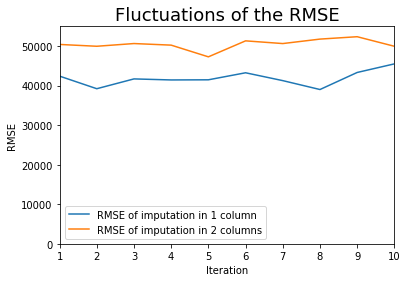

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1, 1)
sns.lineplot(x=list(range(1,11)), y=results_1_column, ax=ax)
sns.lineplot(x=list(range(1,11)), y=results_2_columns, ax=ax)
plt.title("Fluctuations of the RMSE", fontsize=18)
plt.ylim(0,max(max(results_1_column),max(results_2_columns))*1.05)
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.xlim(1,10)
ax.legend(labels=['RMSE of imputation in 1 column', 'RMSE of imputation in 2 columns'])
plt.show()

Note, that RMSE presented on this plot is calculated only for the imputated values.

As expected, when more values were missing, the imputation got a bit worse but still close to the first scenario (where values were imputed only in one column).